# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Taburno, Jasper Thon\
_Student No._: 202008096\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Jasper Thon Jaducana Taburno**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In [2]:
import numpy as np
from math import exp, sin
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation, PillowWriter
from IPython.display import Image

In [6]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation, PillowWriter
from IPython.display import Image

# Part 1
# Function to calculate total energy using vectorized operations
def total_energy(lattice, J):
    # Calculate contributions from adjacent spins using array operations
    adjacent_sum = (
        lattice * np.roll(lattice, 1, axis=0) +  # Contribution from spins above
        lattice * np.roll(lattice, -1, axis=0) +  # Contribution from spins below
        lattice * np.roll(lattice, 1, axis=1) +  # Contribution from spins to the right
        lattice * np.roll(lattice, -1, axis=1)  # Contribution from spins to the left
    )
    # Sum all contributions and multiply by -J
    total_energy = -J * np.sum(adjacent_sum)
    return total_energy

# Set up a 20x20 lattice with random spins
lattice = np.random.choice([-1, 1], size=(20, 20))
J = 1  # Interaction constant

# Measure compilation time
start_time = time.time()

# Calculate total energy using the vectorized function
energy_result = total_energy(lattice, J)

# Print the result and compilation time
print(f"Total Energy: {energy_result} J")
print(f"Compilation Time: {time.time() - start_time} seconds")


Total Energy: -112 J
Compilation Time: 0.0 seconds


In [3]:
#Part 2
def total_energy(lattice, J):
    adjacent_sum = (
        lattice * np.roll(lattice, 1, axis=0) +
        lattice * np.roll(lattice, -1, axis=0) +
        lattice * np.roll(lattice, 1, axis=1) +
        lattice * np.roll(lattice, -1, axis=1)
    )
    total_energy = -J * np.sum(adjacent_sum)
    return total_energy

# Function to perform Metropolis-style simulation
def metropolis_simulation(lattice, J, temperature, steps):
    beta = 1 / temperature  # Boltzmann factor

    for step in range(steps):
        # Choose a random spin
        x, y = np.random.randint(0, lattice.shape[0]), np.random.randint(0, lattice.shape[1])

        # Flip the spin
        lattice[x, y] *= -1

        # Calculate old and new energy
        old_energy = total_energy(lattice, J)
        lattice[x, y] *= -1  # Flip back to the original state
        new_energy = total_energy(lattice, J)

        # Calculate energy difference
        delta_energy = new_energy - old_energy

        # Decide whether to accept the flip using the Metropolis acceptance formula
        if delta_energy < 0 or np.random.rand() < np.exp(-beta * delta_energy):
            lattice[x, y] *= -1  # Keep the flipped spin if accepted

    return lattice

# Set up a 20x20 lattice with random spins
initial_lattice = np.random.choice([-1, 1], size=(20, 20))
J = 1  # Interaction constant
temperature = 1  # Temperature
steps = 1000000  # Number of Monte Carlo steps

# Measure simulation time
start_time = time.time()

# Perform Metropolis-style simulation
final_lattice = metropolis_simulation(initial_lattice, J, temperature, steps)

# Print simulation time
print(f"Simulation Time: {time.time() - start_time} seconds")

Simulation Time: 96.58577561378479 seconds


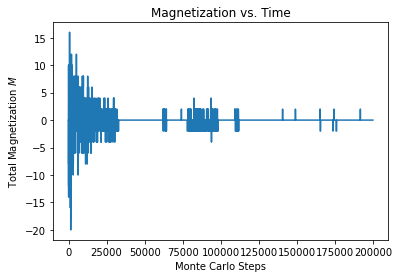

In [9]:
#Part 3
# Function to calculate total energy using vectorized operations
def total_energy(lattice, J):
    adjacent_sum = (
        lattice * np.roll(lattice, 1, axis=0) +
        lattice * np.roll(lattice, -1, axis=0) +
        lattice * np.roll(lattice, 1, axis=1) +
        lattice * np.roll(lattice, -1, axis=1)
    )
    total_energy = -J * np.sum(adjacent_sum)
    return total_energy

# Function to perform Metropolis-style simulation and record magnetization
def metropolis_simulation_with_magnetization(lattice, J, temperature, steps):
    beta = 1 / temperature
    magnetization_values = []

    for step in range(steps):
        # Choose a random spin
        x, y = np.random.randint(0, lattice.shape[0]), np.random.randint(0, lattice.shape[1])

        # Flip the spin
        lattice[x, y] *= -1

        # Calculate old and new energy
        old_energy = total_energy(lattice, J)
        lattice[x, y] *= -1  # Flip back to the original state
        new_energy = total_energy(lattice, J)

        # Calculate energy difference
        delta_energy = new_energy - old_energy

        # Decide whether to accept the flip using the Metropolis acceptance formula
        if delta_energy < 0 or np.random.rand() < np.exp(-beta * delta_energy):
            lattice[x, y] *= -1  # Keep the flipped spin if accepted

        # Record magnetization at each step
        magnetization_values.append(np.sum(lattice))

    return lattice, np.array(magnetization_values)

# Set up a 20x20 lattice with random spins
initial_lattice = np.random.choice([-1, 1], size=(20, 20))
J = 1  # Interaction constant
temperature = 1  # Temperature
steps = 200000  # Number of Monte Carlo steps

# Perform Metropolis-style simulation with magnetization recording
final_lattice, magnetization_values = metropolis_simulation_with_magnetization(
    initial_lattice, J, temperature, steps
)

# Plot magnetization vs. time
plt.plot(range(steps), magnetization_values)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Total Magnetization $M$')
plt.title('Magnetization vs. Time')
plt.show()

Part 4:

The simulation of the Ising model on a 20x20 lattice for 200,000 Monte Carlo steps demonstrates the inherent unpredictability in the behavior of magnetic spins. Upon multiple executions, the magnetic alignment, represented by the magnetization sign, varies due to the initial random spin configuration and the probabilistic nature of the Metropolis algorithm. The system undergoes equilibration, settling into a stable state with consistent magnetization. The temperature parameter influences the likelihood of spin flips, affecting the exploration of different magnetic configurations. The findings emphasize the stochastic nature of the Ising model and its dynamic evolution, reflecting the interplay of thermal fluctuations and magnetic interactions.